0.0144871855754


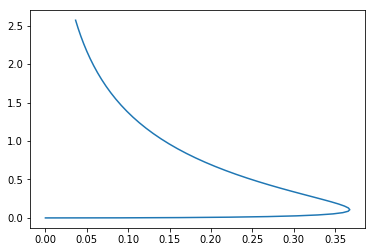

In [3]:
# a sprinkler
import math
import matplotlib.pyplot as plt

def fv(v, v0): # initial speed distribution
    vv0 = v / v0
    return vv0 / v0 * math.exp(-vv0)

def x0(theta, v0, g): # distance of droplet
    t0 = v0 / g * ( math.sqrt(math.sin(theta)**2.+1.) - math.sin(theta) )
    return 2. * t0 * v0 * math.cos(theta)

if __name__=="__main__":
    print x0( math.radians(30.), fv(1., 1.), 10.)
    #v = [float(n)/10. for n in range(0, 50)]
    v = [fv(float(n)/10., 1.) for n in range(0, 50)]
    #x = [x0( math.radians(30.), fv(float(n)/10., 1.), 10.) for n in range(0, 50)]
    x = [x0( math.radians(30.), float(n)/10., 10.) for n in range(0, 50)]
    _ = plt.plot(v, x, '-')
    plt.show()
    #print x

In [35]:
# approximation 2
import math

if __name__=="__main__":
    tgt = 0.3877792
    amin = 0
    bmin = 0
    dmin = 1000.
    for a in range(1,100):
        for b in range(1,100):
            diff = abs(tgt - float(a)/float(b))
            if diff < dmin:
                dmin = diff
                amin = a
                bmin = b
    print amin
    print bmin
    print float(amin) / float(bmin)

19
49
0.387755102041


In [3]:
# gcd
def divisors(a):
    res = [x for x in range(1,a+1) if a % x == 0]
    return res

def gcd(a,b):
    if b > a:
        c = a
        a = b
        b = c
    an = a
    bn = b
    rn = 1
    while rn > 0:
        rn = an % bn
        an = bn
        bn = rn
    return an

def gcd_iter(u, v):
    while v:
        u, v = v, u % v
    return abs(u)

def gcd_bin(u, v):
    u, v = abs(u), abs(v) # u >= 0, v >= 0
    if u < v:
        u, v = v, u # u >= v >= 0
    if v == 0:
        return u
    # u >= v > 0
    k = 1
    while u & 1 == 0 and v & 1 == 0: # u, v - even
        u >>= 1; v >>= 1
        k <<= 1
    t = -v if u & 1 else u
    while t:
        while t & 1 == 0:
            t >>= 1
        if t > 0:
            u = t
        else:
            v = -t
        t = u - v
    return u * k

def redfrac(num, denom): # reduce fraction
    ndgcd = gcd_bin(num, denom)
    return [ num / ndgcd, denom / ndgcd ]

if __name__=='__main__':
    #print gcd(24,16)
    print redfrac(234, 766)

[117, 383]


In [54]:
# integers and primes
import math

def primes(n): # primes up to n via sieve
    res = range(2, n+1)
    idx = range(2, n+1)
    for k in res:
        for i in range(k, n, k):
            if i % k == 0 and i > k:
                idx[i-2] = 0
    return idx

def afrombp(b,p):
    tmp = math.sqrt(b*b-4.*(b*b-p))
    return [(-b+tmp)/2., (-b-tmp/2.)]

def cfromdab(d,a,b):
    tmp = math.sqrt(-3.*d*d+4.*(a+b)**2-a*b)
    return [(d+tmp)/2., (d-tmp)/2.]

if __name__=='__main__':
    lp = primes(100)
    for p in lp[2:]:
        cdsum = 0
        for b in range(1,2*int(p)):
            if p >= b*b:
                a = afrombp(b,p)
                if a[0].is_integer():
                    for asol in a:
                        for d in range(1,p):
                            if 4.*(asol+b)**2 > asol*b+3.*d*d:
                                c = cfromdab(d,asol,b)
                                if c[0].is_integer():
                                    cdsum += c[0] + d
                                    cdsum += c[1] + d
                        print 'a: %d b: %d cdsum: %d ?== %i' % (asol, b, cdsum, 6*(asol+b))

a: 2 b: 1 cdsum: 0 ?== 18
a: -3 b: 1 cdsum: 0 ?== -15
a: 1 b: 2 cdsum: 0 ?== 18
a: -4 b: 2 cdsum: 0 ?== -12
a: 3 b: 1 cdsum: 0 ?== 24
a: -4 b: 1 cdsum: 0 ?== -21
a: 1 b: 3 cdsum: 0 ?== 24
a: -5 b: 3 cdsum: 0 ?== -15
a: 3 b: 2 cdsum: 0 ?== 30
a: -6 b: 2 cdsum: 30 ?== -24
a: 2 b: 3 cdsum: 30 ?== 30
a: -6 b: 3 cdsum: 30 ?== -21
a: 5 b: 1 cdsum: 0 ?== 36
a: -6 b: 1 cdsum: 0 ?== -33
a: 1 b: 5 cdsum: 0 ?== 36
a: -8 b: 5 cdsum: 0 ?== -21
a: 4 b: 3 cdsum: 0 ?== 42
a: -8 b: 3 cdsum: 0 ?== -33
a: 3 b: 4 cdsum: 0 ?== 42
a: -9 b: 4 cdsum: 0 ?== -30
a: 6 b: 1 cdsum: 0 ?== 42
a: -7 b: 1 cdsum: 0 ?== -39
a: 1 b: 6 cdsum: 0 ?== 42
a: -10 b: 6 cdsum: 36 ?== -24
a: 5 b: 4 cdsum: 60 ?== 54
a: -11 b: 4 cdsum: 60 ?== -42
a: 4 b: 5 cdsum: 120 ?== 54
a: -11 b: 5 cdsum: 120 ?== -39
a: 7 b: 2 cdsum: 0 ?== 54
a: -10 b: 2 cdsum: 0 ?== -48
a: 2 b: 7 cdsum: 0 ?== 54
a: -12 b: 7 cdsum: 0 ?== -33
a: 8 b: 1 cdsum: 60 ?== 54
a: -9 b: 1 cdsum: 60 ?== -51
a: 1 b: 8 cdsum: 120 ?== 54
a: -13 b: 8 cdsum: 120 ?== -30
a: 7 b

In [25]:
# 3 cards 3 players
import random
from itertools import groupby

def flipcrds(n): # flip cards for n players
    cards = [1,2,3]
    res = []
    for i in range(n):
        random.shuffle(cards)
        res.append(cards[0])
    return res

def countfc(n): # count same cards
    cards = flipcrds(n)
    freqc = [len(list(group)) for key, group in groupby(cards)]
    return max(freqc)

if __name__ == '__main__':
    #print flipcrds(3)
    #print countfc(3)
    nrg = 100000
    ctr = 0
    for i in range(nrg):
        if countfc(3) == 3:
            ctr += 1
    print float(ctr) / float(nrg)

0.1111


In [37]:
# a limit
import math

def an(a,n): # a(n+1)=a^a(n)
    if n==0:
        return a
    exa = a
    for i in range(n):
        exa = math.exp(exa * math.log(a))
    return exa

if __name__ == '__main__':
    #print an(1.1, 3)
    #print 1.1**(1.1**(1.1**1.1))
    #print an(math.e/2., 100000)
    print an(math.e**(1./math.e), 1000000)

2.71827639183


In [1]:
# Richard takes steps
import random
import math
#import matplotlib.pyplot as plt

def astep(): # a random step in 4 cardinal directions
    drcts = [0,1,2,3]
    random.shuffle(drcts)
    return drcts[0]

def enpt(n): # endpoint after n steps
    spoint = [0,0]
    for i in range(n):
        s = astep()
        if s == 0:
            spoint[0] += 1
        if s == 1:
            spoint[1] -= 1
        if s == 2:
            spoint[0] -= 1
        if s == 3:
            spoint[1] += 1
    return spoint

def ldist(a,b):
    return math.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

if __name__ == '__main__':
    #print astep()
    #print enpt(10)
    #print ldist(enpt(10),[4,4])
    #mindh = []
    mindh = {}
    for i in range(3500):
        mind = 1000.
        nmin = 10000
        nsmax = 40
        for nstps in range(1,nsmax):
            ep = enpt(nstps)
            lep = ldist(ep,[4.,4.])
            if lep < mind:
                mind = lep
                nmin = nstps  
        #print nmin
        #print mind
        #mindh.append([nmin, mind])
        if mindh.has_key(nmin):
            mindh[nmin] += [mind]
        else:
            mindh[nmin] = [mind]
    #mindh.sort()
    #print '28: %d %2.2f' % (len(mindh[28]), reduce(lambda x, y: x + y, mindh[28]) / len(mindh[28]))
    #print '29: %d %2.2f' % (len(mindh[29]), reduce(lambda x, y: x + y, mindh[29]) / len(mindh[29]))
    #print '30: %d %2.2f' % (len(mindh[30]), reduce(lambda x, y: x + y, mindh[30]) / len(mindh[30]))
    #print '31: %d %2.2f' % (len(mindh[31]), reduce(lambda x, y: x + y, mindh[31]) / len(mindh[31]))
    #print '32: %d %2.2f' % (len(mindh[32]), reduce(lambda x, y: x + y, mindh[32]) / len(mindh[32]))
    #print '33: %d %2.2f' % (len(mindh[33]), reduce(lambda x, y: x + y, mindh[33]) / len(mindh[33]))
    #print '34: %d %2.2f' % (len(mindh[34]), reduce(lambda x, y: x + y, mindh[34]) / len(mindh[34]))
    for i in range(1,len(mindh)):
        if mindh.has_key(i):
            print '%d: %d %2.3f' % (i,len(mindh[i]), reduce(lambda x, y: x + y, mindh[i]) / len(mindh[i]))
    #x = [n for n in range(1, nsmax)]
    #y = [mindh[n] for n in range(1, nsmax) if mindh.has_key(n)]
    #n, bins, patches = plt.hist(mindh, 50, normed=1, facecolor='green', alpha=0.75)
    #_ = plt.plot(x, y, '-')
    #l = plt.plot(bins, y, 'r--', linewidth=1)
    #plt.show()

3: 6 3.692
4: 13 2.931
5: 19 2.452
6: 30 2.167
7: 52 2.151
8: 62 1.937
9: 73 1.693
10: 77 1.852
11: 98 1.643
12: 86 1.708
13: 113 1.653
14: 95 1.555
15: 136 1.526
16: 120 1.624
17: 130 1.456
18: 109 1.598
19: 133 1.463
20: 109 1.470
21: 106 1.515
22: 137 1.397
23: 121 1.503
24: 111 1.436
25: 120 1.507
26: 97 1.474
27: 107 1.404
28: 138 1.523
29: 114 1.530
30: 98 1.395
31: 95 1.383
32: 119 1.391
33: 90 1.468
34: 111 1.397
35: 91 1.402
36: 94 1.390


[0.08382021562346303, 0.0006797843764586933]
[151.06324018134035, 1.4598598186598166]
[265.3529396030364, 3.539460396963727]


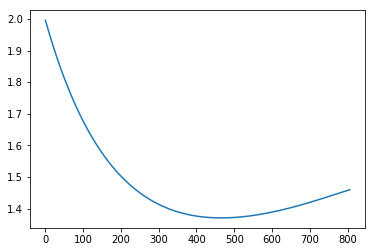

In [67]:
# drums with saltwater
import matplotlib.pyplot as plt

def dmdt0(totw,wslt,loss): # return updated mass for this drum
    return [loss*(totw-wslt)/totw, loss*wslt/totw]

if __name__ == '__main__':
    drum0 = [40.*8.33, 3.]
    drum1 = [10.*8.33, 2.]
    drum2 = [0., 0.]
    x = []
    y = []
    for i in range(807):
        d0 = dmdt0(drum0[0], drum0[1], 5.*8.33/100.)
        drum0[0] -= d0[0]
        drum0[1] -= d0[1]
        d1 = dmdt0(drum1[0], drum1[1], 4.*8.33/100.)
        #print d0
        drum1[0] += d0[0] - d1[0]
        drum1[1] += d0[1] - d1[1]
        drum2[0] += d1[0]
        drum2[1] += d1[1]
        x.append(i)
        y.append(drum1[1])
    print drum0
    print drum1
    print drum2
    #x = [n for n in range(1, nsmax)]
    #y = [mindh[n] for n in range(1, nsmax) if mindh.has_key(n)]
    _ = plt.plot(x, y, '-')
    plt.show()

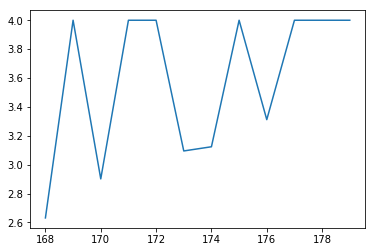

In [223]:
# ellipse and 3 circles
import math
import matplotlib.pyplot as plt

def b(r,alph):
    return r*(2.*math.cos(alph)+1.)

def a2(r,alph,xx0):
    bb = b(r,alph)**2
    salph = math.sin(alph)
    return (2.*bb*r*salph*xx0-bb*xx0*xx0) / (r*r - (xx0-2.*r*salph)**2)

def x0(r,alph,aa):
    bb = b(r,alph)**2
    salph = math.sin(alph)
    return ( -4.*aa*r*salph + math.sqrt(abs(16.*aa*aa*r*r*salph*salph - 4.*(bb-aa)*aa*(r*r-bb-4.*r*r*salph*salph)))) / (2.*(bb-aa))

def area(aa,bb):
    return math.pi * aa * bb

if __name__ == '__main__':
    r = 1.0
    x = []
    y = []
    for tang in range(168,180):
        alph = math.radians(float(tang)/10.)
        x.append(tang)
        b00 = b(r,alph)
        a00 = a2(r,alph,1.1)
        x00 = x0(r,alph,a00)
        #print 'x0 %d  A %f' % (x00, area(a00,b00))
        for i in range(20):
            a00 = ( a2(r,alph,x00) + a00 ) / 2.
            x00 = ( x0(r,alph,a00) + x00 ) / 2.
            #print 'x0 %f  A %f' % (x00, area(a00,b00))
        y.append(min(4., abs(area(a00,b00))))
    _ = plt.plot(x, y, '-')
    plt.show()

In [20]:
# a limit 2
import math

def an(a,n): # a(n+1)=a^a(n)
    if n==0:
        return a
    exa = a
    for i in range(n):
        exa = math.exp(exa * math.log(a))
    return exa

def lsqrtl(l): # l**(1./l) approx
    return l**(1./l)
    #return 1. + math.log(l) / l

if __name__ == '__main__':
    #print an(1.1, 3)
    #print 1.1**(1.1**(1.1**1.1))
    print an(1e-28, 1000000)
    #print an(math.e**(1./math.e), 1000000)
    #print lsqrtl(0.000000000001)

1e-28


In [44]:
# 3 triangles
import math

def a1(a,b,s):
    return math.sqrt(s*(s-a)*(s-b)*(s-13.))

def a2(b,c,s):
    return math.sqrt(s*(s-b)*(s-c)*(s-15.))

def a3(a,c,s):
    return math.sqrt(s*(s-a)*(s-c)*(s-14.))

if __name__ == '__main__':
    c=6.9
    for i in range(10):
        c+=0.1
        b=1.+float(c)
        #p=16.+2.*float(c)
        s=8.+float(c)
        a=2.+float(c)
        aa1=a1(a,b,s)
        aa2=a2(b,float(c),s)
        #aa3=a3(a,float(c),s)
        aa3=84.-aa1-aa2
        saa = aa1+aa2+aa3
        print 'c=%f: %f %f %f' % (c, aa2/saa, aa3/saa, aa1/saa)
    print '1: %f %f %f' % (2./11., 4./11., 5./11.)
    print '2: %f %f %f' % (3./16., 6./16., 7./16.)
    print '3: %f %f %f' % (4./20., 7./20., 9./20.)
    print '4: %f %f %f' % (5./28., 11./28., 12./28.)

c=7.000000: 0.000000 0.577423 0.422577
c=7.100000: 0.109472 0.456074 0.434454
c=7.200000: 0.155329 0.398524 0.446148
c=7.300000: 0.190863 0.351465 0.457673
c=7.400000: 0.221108 0.309850 0.469042
c=7.500000: 0.248008 0.271727 0.480265
c=7.600000: 0.272554 0.236092 0.491354
c=7.700000: 0.295334 0.202350 0.502316
c=7.800000: 0.316729 0.170111 0.513160
c=7.900000: 0.337004 0.139103 0.523893
1: 0.181818 0.363636 0.454545
2: 0.187500 0.375000 0.437500
3: 0.200000 0.350000 0.450000
4: 0.178571 0.392857 0.428571


In [52]:
# power sums and divisibility

def powsum(ex,n):
    res = 0
    for i in range(1,n+1):
        res += i**ex
    return res

if __name__ == '__main__':
    ilim = 2019
    for iex in range(2016,ilim):
        for nn in range(2,ilim):
            ps = powsum(iex,nn)
            if ps % iex == 0:
                print 'iex: %d n: %d' % (iex,nn)
                break

iex: 2016 n: 1984
iex: 2017 n: 2016
iex: 2018 n: 504


In [19]:
# integer as sum of consecuteives
import math

def nn(k,n):
    sq = math.sqrt((2.*k-1.)**2.+8.*n)
    return ( (1.-2.*k)+sq ) / 2.

if __name__ == '__main__':
    nlim = 2019
    for n in range(2018,nlim):
        for k in range(1,5):
            nn0 = nn(k,n)
            print 'N: %d n: %d' % (n,nn0)

N: 2018 n: 63
N: 2018 n: 62
N: 2018 n: 61
N: 2018 n: 60


In [20]:
# Bayesian decision
import math

def likeh(i,j): # likelihood ratio coin tosses 2 theories
    nomin = 6.*math.factorial(i+1)*math.factorial(j+1)/math.factorial(i+j+3)
    return nomin / (3./4.)**i / (1./4.)**j

if __name__ == '__main__':
    for i in range(1,10):
        print 'heads: %d tails: %d likelihood: %f' % (i,10-i,likeh(i,10-i))

heads: 1 tails: 9 likelihood: 2444.233100
heads: 2 tails: 8 likelihood: 244.423310
heads: 3 tails: 7 likelihood: 36.210861
heads: 4 tails: 6 likelihood: 7.543929
heads: 5 tails: 5 likelihood: 2.155408
heads: 6 tails: 4 likelihood: 0.838214
heads: 7 tails: 3 likelihood: 0.447048
heads: 8 tails: 2 likelihood: 0.335286
heads: 9 tails: 1 likelihood: 0.372540


In [4]:
# determinants
import numpy as np

a = np.array([[1, 2, 3, 4, 5], [2, 4, 6, 8, 10], [3, 6, 9, 12, 15], [4, 8, 12, 16, 20], [5, 10, 15, 20, 25]])
print np.linalg.det(a)
b = np.array([[1, -2, 3, -4, 5], [-2, 4, -6, 8, -10], [3, -6, 9, -12, 15], [-4, 8, -12, 16, -20], [5, -10, 15, -20, 25]])
print np.linalg.det(b)

0.0
0.0


In [3]:
# Viterbi algorithm: finding the most likely sequence of hidden states

def viterbi(obs, states, start_p, trans_p, emit_p):
    V = [{}]
    for st in states:
        V[0][st] = {"prob": start_p[st] * emit_p[st][obs[0]], "prev": None}
    # Run Viterbi when t > 0
    for t in range(1, len(obs)):
        V.append({})
        for st in states:
            max_tr_prob = V[t-1][states[0]]["prob"]*trans_p[states[0]][st]
            prev_st_selected = states[0]
            for prev_st in states[1:]:
                tr_prob = V[t-1][prev_st]["prob"]*trans_p[prev_st][st]
                if tr_prob > max_tr_prob:
                    max_tr_prob = tr_prob
                    prev_st_selected = prev_st
                    
            max_prob = max_tr_prob * emit_p[st][obs[t]]
            V[t][st] = {"prob": max_prob, "prev": prev_st_selected}
                    
    for line in dptable(V):
        print line
    opt = []
    # The highest probability
    max_prob = max(value["prob"] for value in V[-1].values())
    previous = None
    # Get most probable state and its backtrack
    for st, data in V[-1].items():
        if data["prob"] == max_prob:
            opt.append(st)
            previous = st
            break
    # Follow the backtrack till the first observation
    for t in range(len(V) - 2, -1, -1):
        opt.insert(0, V[t + 1][previous]["prev"])
        previous = V[t + 1][previous]["prev"]
    print 'The steps of states are ' + ' '.join(opt) + ' with highest probability of %s' % max_prob

def dptable(V):
    # Print a table of steps from dictionary
    yield " ".join(("%12d" % i) for i in range(len(V)))
    for state in V[0]:
        yield "%.7s: " % state + " ".join("%.7s" % ("%f" % v[state]["prob"]) for v in V)

if __name__ == '__main__':
    obs = ('normal', 'cold', 'dizzy')
    states = ('Healthy', 'Fever')
    start_p = {'Healthy': 0.6, 'Fever': 0.4}
    trans_p = {
       'Healthy' : {'Healthy': 0.7, 'Fever': 0.3},
       'Fever' : {'Healthy': 0.4, 'Fever': 0.6}
       }
    emit_p = {
       'Healthy' : {'normal': 0.5, 'cold': 0.4, 'dizzy': 0.1},
       'Fever' : {'normal': 0.1, 'cold': 0.3, 'dizzy': 0.6}
       }
    viterbi(obs, states, start_p, trans_p, emit_p)

           0            1            2
Healthy: 0.30000 0.08400 0.00588
Fever: 0.04000 0.02700 0.01512
The steps of states are Healthy Healthy Fever with highest probability of 0.01512


In [20]:
# 14444...
import math

def n14(n):
    res = 10.**n + 4.*(10.**n-1.)/9.
    return res

if __name__ == '__main__':
    #print math.sqrt(n14(3))
    for i in range(1,30):
        res = math.sqrt(n14(i))
        if float(res).is_integer():
            print 'i: %d : %f' % (i,res)

i: 2 : 12.000000
i: 3 : 38.000000
i: 29 : 380058475033046.000000


In [24]:
# cross entropy and perplexity
import numpy as np

def cross_entropy(predictions, targets, epsilon=1e-12):
    """
    Computes cross entropy between targets (encoded as one-hot vectors)
    and predictions. 
    Input: predictions (N, k) ndarray
           targets (N, k) ndarray        
    Returns: scalar
    """
    predictions = np.clip(predictions, epsilon, 1. - epsilon) # clip - limit the values in an array
    N = predictions.shape[0]
    ce = -np.sum(targets*np.log(predictions+1e-9))/N
    return ce

def perplexity(predictions, targets, epsilon=1e-12): # perplexity = 2 ^ H(p,q)
    return 2.**cross_entropy(predictions, targets)

if __name__ == '__main__':
    predictions = np.array([[0.25,0.25,0.25,0.25],
                            [0.01,0.01,0.01,0.96]])
    targets = np.array([[0,0,0,1],
                       [0,0,0,1]])
    ans = 0.71355817782  # Correct answer
    x = cross_entropy(predictions, targets)
    print x
    print perplexity(predictions, targets)
    print np.isclose(x,ans) # isclose: returns a boolean array where two arrays are element-wise equal within a tolerance

0.7135581752992395
1.6398435441458303
True


In [30]:
# integer roots

def apoly(m,n): # a polynomial - returns True if an integer root
    dmn = m - n
    mn = m * n
    if (dmn**5+mn*(5*dmn*(dmn*dmn+mn)-16)) == 0:
        return True
    return False

if __name__ == '__main__':
    #print apoly(-2,2)
    nrg = 1000
    for m in range(-nrg,nrg):
        for n in range(-nrg,nrg):
            if apoly(m,n):
                print 'm: %d n: %d' % (m,n)

m: -2 n: 2
m: 0 n: 0


In [12]:
# some perfect squares
import math

def perfsql(n):
    return [i*i for i in range(1,n+1)]

def psmult(psl):
    res = []
    for p in psl:
        for k in range(2,len(psl)):
            if p*k in psl:
                res.append(k)
    return res

if __name__ == '__main__':
    #print perfsql(15)
    psl = perfsql(100)
    print psmult(psl)
    setsz = 6
    allcand = []
    for a in range(1,setsz):
        candb = []
        for b in range(1,setsz):
            keepb = True
            for k in range(1,50):
                if (k*a) in psl and (k*b) in psl:
                    keepb = False
                    #print b
                    break
            if keepb:
                candb.append(b)
        print 'a: %d : [%s]' % (a,', '.join(map(str, candb)))
        print len(candb)
        allcand.append(candb)
    finals = []
    for a in range(1,setsz):
        isinall = True
        for b in allcand:
            if not a in b:
                isinall = False
                break
        if isinall:
            finals.append(a)
    print finals
    print len(finals)

[4, 9, 16, 25, 36, 49, 64, 81, 4, 9, 16, 25, 36, 49, 64, 81, 4, 9, 16, 25, 36, 49, 64, 81, 4, 9, 16, 25, 36, 49, 64, 81, 4, 9, 16, 25, 36, 49, 64, 81, 4, 9, 16, 25, 36, 49, 64, 81, 4, 9, 16, 25, 36, 49, 64, 81, 4, 9, 16, 25, 36, 49, 64, 81, 4, 9, 16, 25, 36, 49, 64, 81, 4, 9, 16, 25, 36, 49, 64, 81, 4, 9, 16, 25, 36, 49, 64, 81, 4, 9, 16, 25, 36, 49, 64, 4, 9, 16, 25, 36, 49, 4, 9, 16, 25, 36, 49, 4, 9, 16, 25, 36, 4, 9, 16, 25, 36, 4, 9, 16, 25, 4, 9, 16, 25, 4, 9, 16, 25, 4, 9, 16, 25, 4, 9, 16, 4, 9, 16, 4, 9, 16, 4, 9, 16, 4, 9, 16, 4, 9, 4, 9, 4, 9, 4, 9, 4, 9, 4, 9, 4, 9, 4, 9, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
a: 1 : [2, 3, 5]
3
a: 2 : [1, 3, 4, 5]
4
a: 3 : [1, 2, 4, 5]
4
a: 4 : [2, 3, 5]
3
a: 5 : [1, 2, 3, 4]
4
[]
0


In [34]:
# drawing a flush
import random as rd

def ctlgstrun(lst): # count longest run in list
    lst.sort()
    lastel = lst[0]
    ctr = 0
    maxc = 0
    for el in lst:
        if el == lastel:
            ctr += 1
        else:
            ctr = 1
            lastel = el
        if ctr > maxc:
            maxc = ctr
    return maxc

def isflush(deck):
    if ctlgstrun(deck) > 4:
        return True
    return False

def shtillfl(deck): # shuffle till flush complete
    ctable = []
    ncrds = 0
    while len(deck) > 0:
        rd.shuffle(deck)
        ctable.append(deck.pop(0))
        ncrds += 1
        if isflush(ctable):
            return ncrds
    return ncrds

if __name__ == '__main__':
    #deck = [i%4 for i in range(52)]
    #print deck
    #print len(deck)
    #print ctlgstrun([0,2,3,3,3,1,1,1,1])
    #print shtillfl(deck)
    nruns = 20000
    ctot = 0
    for i in range(nruns):
        deck = [i%4 for i in range(52)]
        ctot += shtillfl(deck)
    print float(ctot) / float(nruns)

12.3475
